In [ ]:
from google.colab import drive
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

drive.mount('/content/drive', force_remount=True)

filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_imagenes.p'

file = open(filename, 'rb')
data = pickle.load(file)
file.close()

nombres= data['nombres']
imagenes = data['imagenes']

Mounted at /content/drive


In [ ]:
filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_dataframe.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,level_0,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,0,0,1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,1,1,1,2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,2,2,2,3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,3,4,4,charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,4,4,5,5,charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [ ]:
data = np.zeros((len(nombres),56*68))

for n,img in enumerate(imagenes):
  img.resize(56*68)
  data[n,:] = img

1)

In [ ]:
pca = PCA(n_components = None)

pca.fit(data)
X_pca = pca.transform(data)

In [ ]:
silhouette_coefficients = []

for k in range(2, 15):
     kkkmeans = KMeans(n_clusters=k)
     kkkmeans.fit(X_pca)
     score = silhouette_score(X_pca, kkkmeans.labels_)
     silhouette_coefficients.append(score)

Text(0, 0.5, 'Promedio coeficientes de Silhouette')

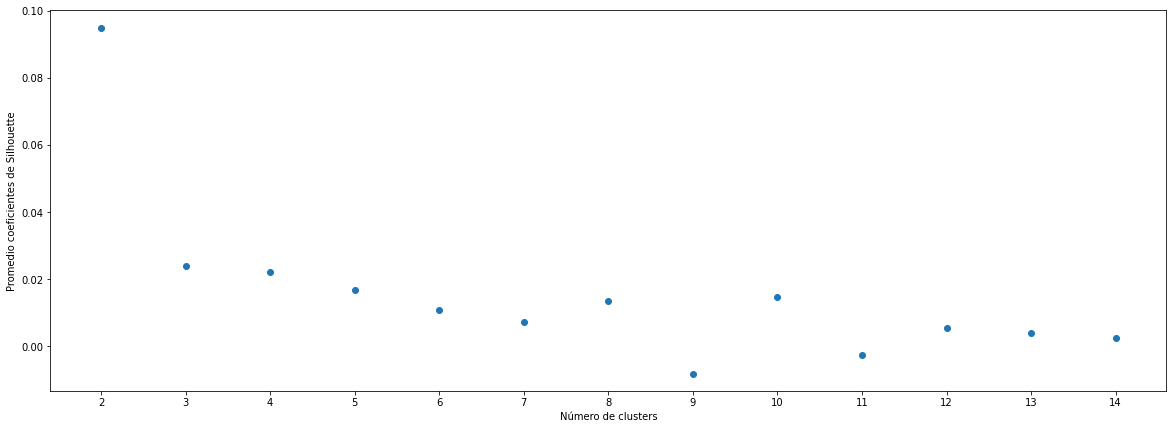

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

# estas lineas son el grafico de SSEvsK
ax.scatter(range(2, 15), silhouette_coefficients)            
ax.set_xticks(range(2, 15))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Promedio coeficientes de Silhouette")

Hay un máximo local cerca de k=8 clusters.

In [ ]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X_pca)
labels = kmeans.labels_ + 1

2)

In [ ]:
centroids = kmeans.cluster_centers_

No handles with labels found to put in legend.


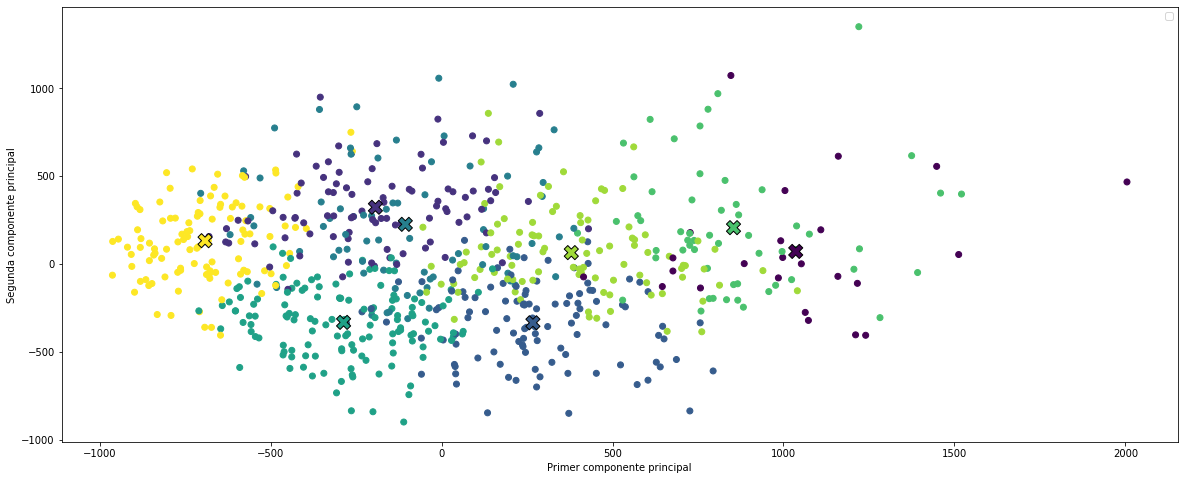

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8))

ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
ax.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, linewidths=1,
            c=np.unique(kmeans.labels_), edgecolors='black')
ax.legend()

ax.set_xlabel('Primera componente principal')
ax.set_ylabel('Segunda componente principal')

plt.show()

3)

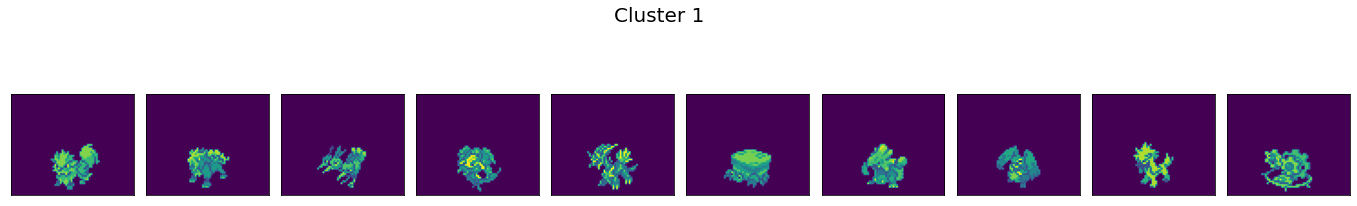

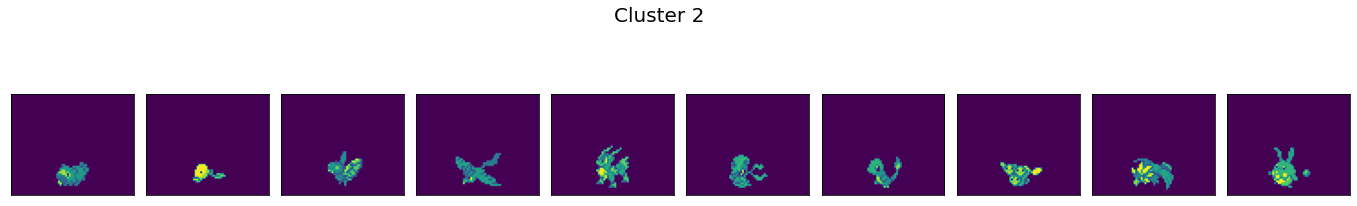

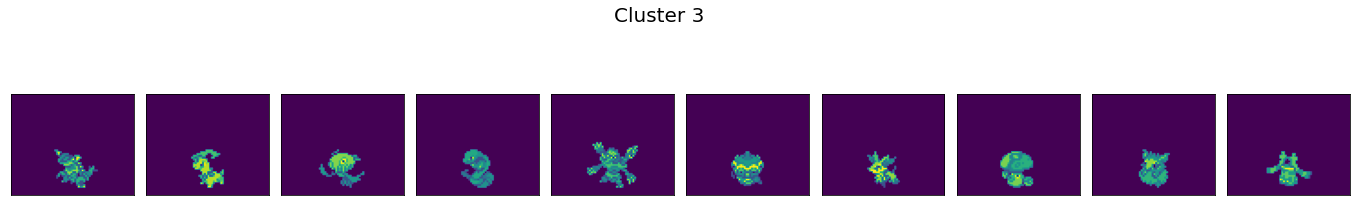

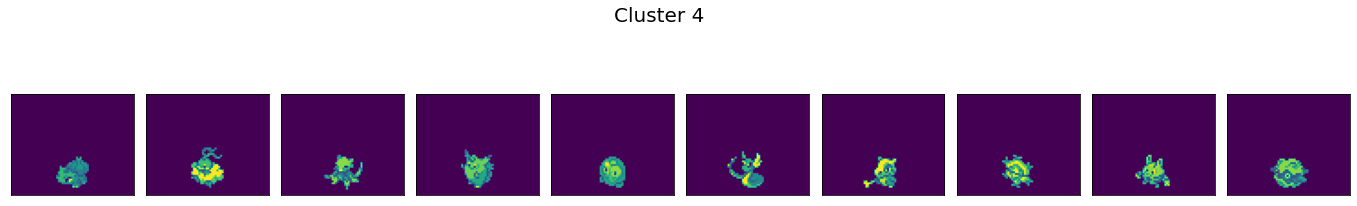

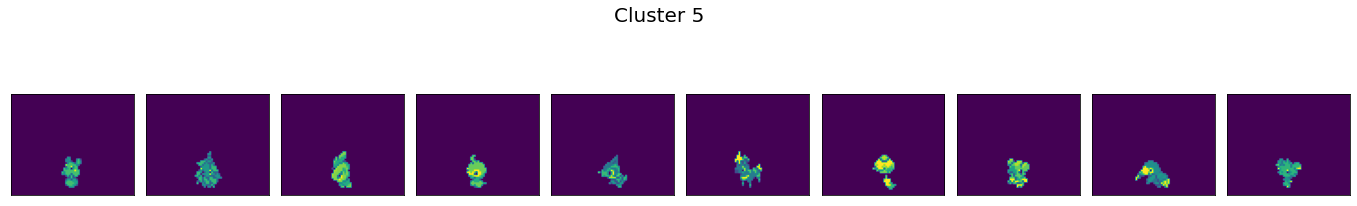

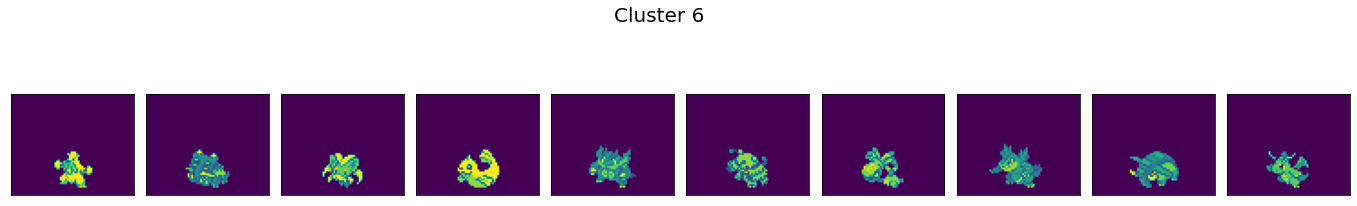

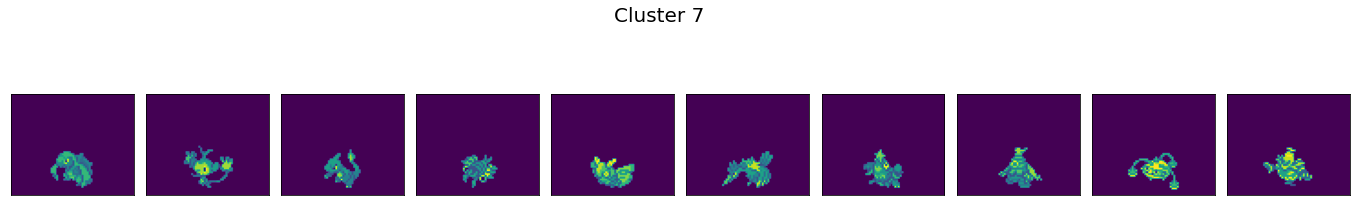

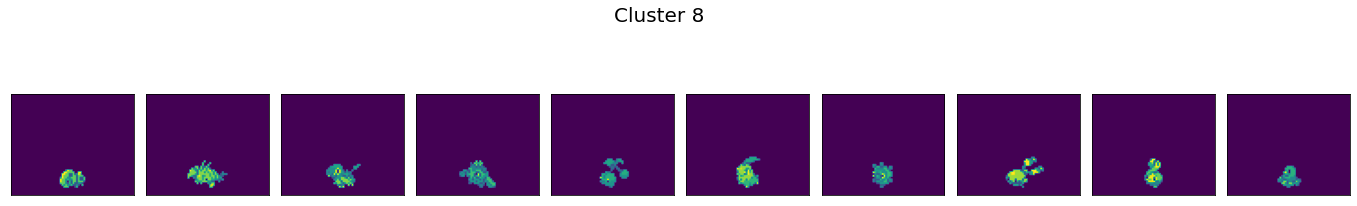

In [ ]:
for i in range(1,9):
    index = np.nonzero(labels==i)[0]                                                                                    
    cluster = data[index].reshape(len(index),56,68)                
    fig, axes = plt.subplots(1, 10, figsize=(24, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(axes.flat):
        ax.imshow(cluster[i])

In [ ]:
tamanos = []
for i in range(data.shape[0]):
  tamanos.append(sum(np.where(data[i], True, False)))

In [ ]:
df2 = pd.DataFrame({'Name': nombres, 'Cluster':labels, 'Tamano':tamanos}) 

In [ ]:
df = df.merge(df2, on="Name")

4)

In [ ]:
grafico = df.groupby('Cluster')[['HP', 'Attack', 'Defense', 'Speed','Tamano']].mean()

In [ ]:
grafico

,HP,Attack,Defense,Speed,Tamano
Cluster,,,,,
1,82.041667,92.083333,102.500000,84.125000,335.791667
2,64.182796,71.602151,61.913978,74.000000,178.892473
3,78.788991,83.412844,77.788991,69.275229,214.715596
4,67.381579,62.539474,68.302632,57.210526,197.960526
5,58.985294,66.602941,59.132353,58.227941,151.397059
6,92.824561,93.491228,86.807018,71.596491,295.280702
7,76.927083,98.416667,87.229167,74.781250,258.500000
8,49.775701,52.962617,56.813084,51.514019,124.420561


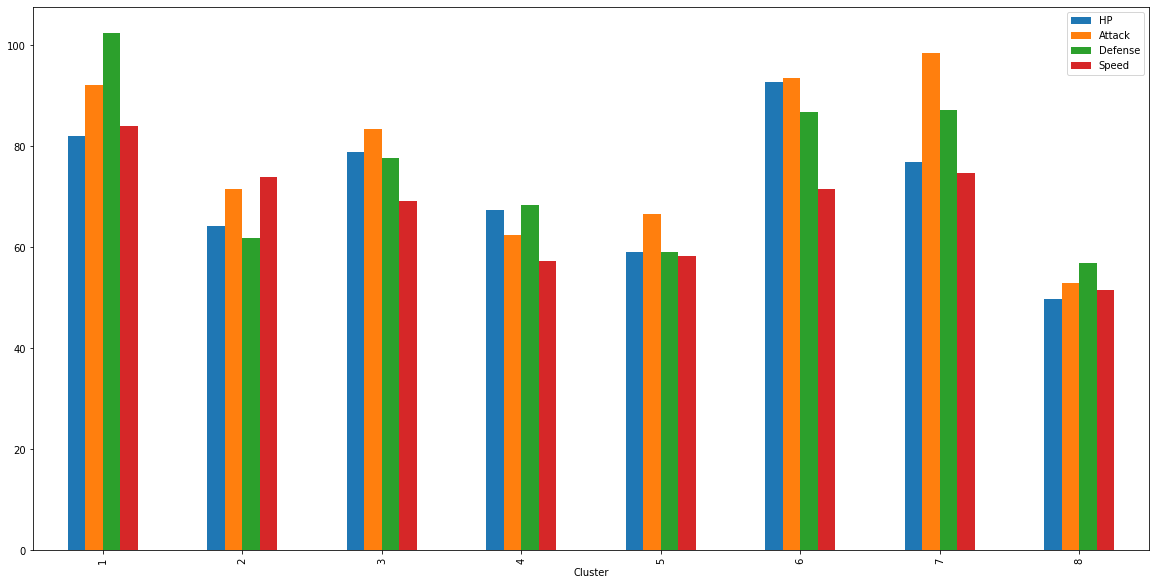

In [ ]:
grafico[['HP', 'Attack', 'Defense', 'Speed']].plot.bar(figsize=(20,10))
plt.show()

Si definimos a los pokemones más fuertes como los que suman más según estos promedios, obtenemos:

In [ ]:
fuerza = grafico['HP'] + grafico['Attack'] + grafico['Defense'] + grafico['Speed']

In [ ]:
fuerza

Cluster
1    360.750000
2    271.698925
3    309.266055
4    255.434211
5    242.948529
6    344.719298
7    337.354167
8    211.065421
dtype: float64

In [ ]:
mas_fuertes = np.argmax(fuerza) + 1
print("El cluster con pokemones más fuertes es el", mas_fuertes)

El cluster con pokemones más fuertes es el 1


5)

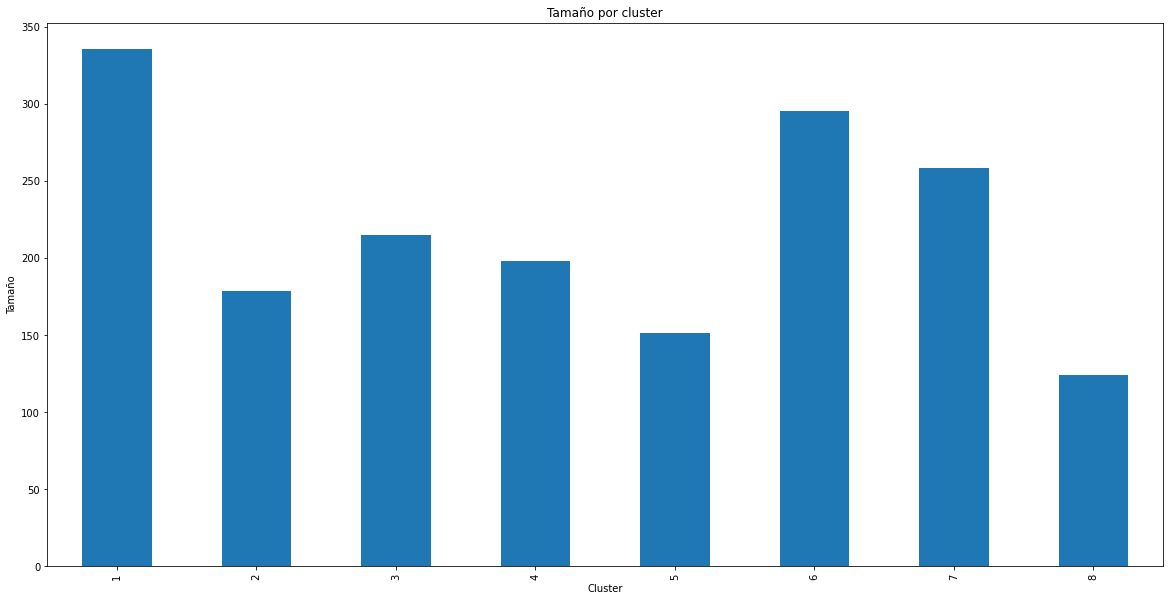

In [ ]:
ax = grafico['Tamano'].plot.bar(figsize=(20,10), title="Tamaño por cluster")
ax.set_ylabel("Tamaño")
plt.show()

In [ ]:
mas_grandes = np.argmax(grafico['Tamano']) + 1
print("El cluster con pokemones más grandes es el", mas_grandes)

El cluster con pokemones más grandes es el 1


No siempre se da que el cluster de pokemones más grandes tenga a los más fuertes. El algoritmo Kmeans tiene distintos resultados dependiendo de su inicialización y cae en mínimos locales. Sin embargo, se puede ver que tamaño promedio y fuerza promedio tienen alta correlación.

In [ ]:
fuerza.corr(grafico['Tamano'])

0.9594876709298314

6)

In [ ]:
grafico = df.groupby('Cluster')['Legendary'].sum().reset_index()

In [ ]:
grafico['Non-Legendary'] = df.groupby('Cluster')['Legendary'].count().reset_index()['Legendary'] - grafico['Legendary']

In [ ]:
grafico['Proporcion'] = grafico['Legendary'] / grafico['Non-Legendary']

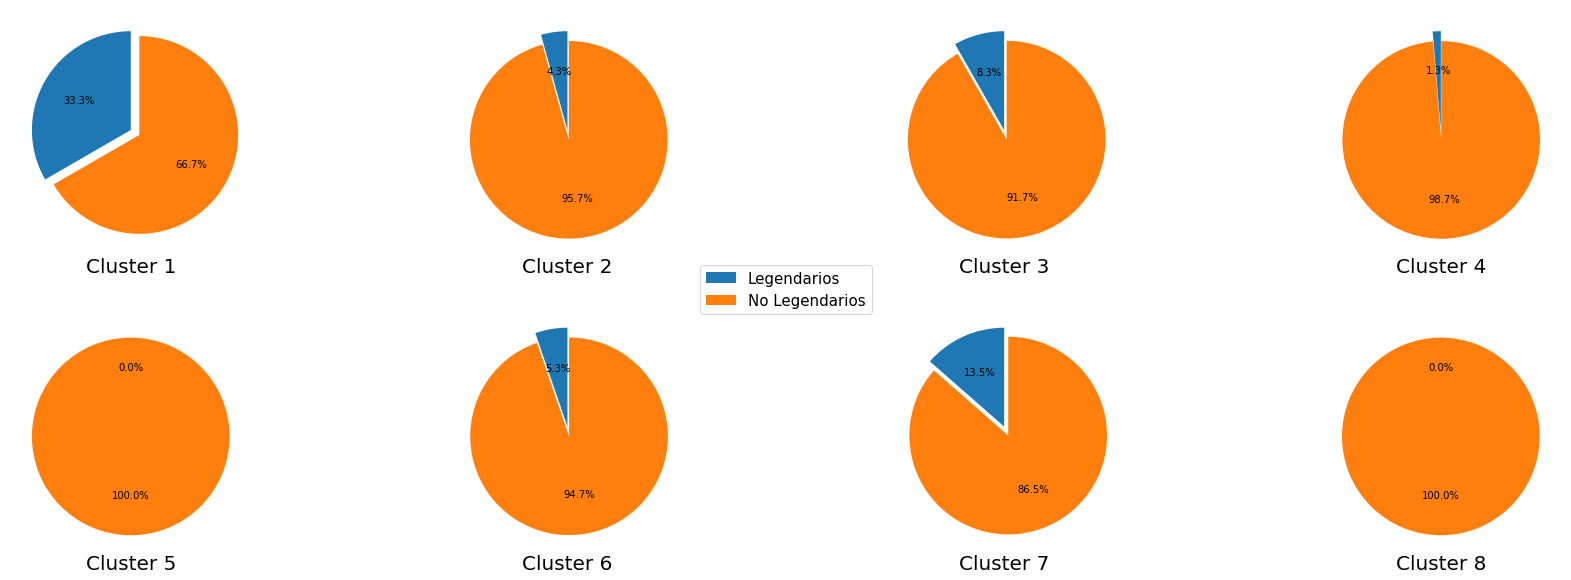

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30, 10))
for i in range(4):
  for j in range(2):
    x = list(grafico.loc[i+j*4][['Legendary', 'Non-Legendary']])
    axs[j][i].pie(x, autopct='%1.1f%%' ,startangle=90, explode=(0, 0.1))
    axs[j][i].set_title('Cluster '+ str(i+1 +j*4), y=-0.1, fontsize=20)

fig.legend(labels=['Legendarios', 'No Legendarios'], loc="center", prop={'size': 15})
plt.show()

In [ ]:
grafico

,Cluster,Legendary,Non-Legendary,Proporcion
0,1,8,16,0.500000
1,2,4,89,0.044944
2,3,9,100,0.090000
3,4,1,75,0.013333
4,5,0,136,0.000000
5,6,3,54,0.055556
6,7,13,83,0.156627
7,8,0,107,0.000000


In [ ]:
legendarios = df.groupby('Legendary')[['HP', 'Attack', 'Defense', 'Speed']].mean()

In [ ]:
legendarios

,HP,Attack,Defense,Speed
Legendary,,,,
False,66.790909,72.962121,68.665152,63.518182
True,94.447368,106.868421,105.578947,93.921053


La proporción #Legendarios / #No legendarios influye mucho en la fuerza calculada. Los pokemones legendarios tienen valores más altos de cada atributo.